# Hyperparameter-tuning for solving the diffusion equation with a neural network. 

### In this notebook we do a grid-search for finding the optimal learning rate and regularization parameter when solving the diffusion equation with a neural network. 

We start by setting up the problem and then iterating through the domain of parameters we want to explore. 

In [3]:
from diffusion_solvers import nn_diffusion_solver
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
tf.reset_default_graph()

Nx = 10
x_np = np.linspace(0,1,Nx)

Nt = 10
t_np = np.linspace(0,1,Nt)

X,T = np.meshgrid(x_np, t_np)

x = X.ravel()
t = T.ravel()

x = tf.reshape(tf.convert_to_tensor(x),shape=(-1,1))
t = tf.reshape(tf.convert_to_tensor(t),shape=(-1,1))

points = tf.concat([x,t],1)

num_iter = 1000
num_hidden_neurons = [50]

learning_rates = [0.1,0.01, 0.001, 0.0001]
regularizations = [0,0.1,0.001]

num_learning_rates = len(learning_rates)
num_regularizations = len(regularizations)

MSEs = np.zeros(shape=(num_learning_rates, num_regularizations))

i= j = 0

for lr in learning_rates:
    for reg_param in regularizations:
        analytic, nn, _, _ = nn_diffusion_solver(num_iter, lr, reg_param, num_hidden_neurons, points, x, t)
        MSE = np.mean((analytic-nn)**2)
        print("MSE = ", MSE)
        tf.get_variable_scope().reuse_variables()
        MSEs[j,i] = MSE
        i+=1
    i=0
    j+=1
    
print(MSEs)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Step: 0 / 1000 loss:  39.35039
Time =  0.5957205295562744  seconds
MSE =  0.0043385188578556454
Step: 0 / 1000 loss:  235.39267
Time =  0.6372947692871094  seconds
MSE =  0.004777571718226303
Step: 0 / 1000 loss:  11.36008
Time =  0.7809116840362549  seconds
MSE =  0.004513362238072854
Step: 0 / 1000 loss:  9.979308
Time =  0.7659497261047363  seconds
MSE =  0.01597701408439354
Step: 0 / 1000 loss:  11.572434
Time =  0.8218028545379639  seconds
MSE =  0.016245065458388636
Step: 0 / 1000 loss:  11.823742
Time =  0.8038113117218018  seconds
MSE =  0.01658264110285771
Step: 0 / 1000 loss:  12.846208
Time =  0.9365081787109375  seconds
MSE =  0.0588840045733517
Step: 0 / 1000 loss:  12.681779
Time =  0.8806109428405762  seconds
MSE =  0.05640846313059979
Step: 0 / 1000 loss:  10

### Plotting a heatmap of the grid-search

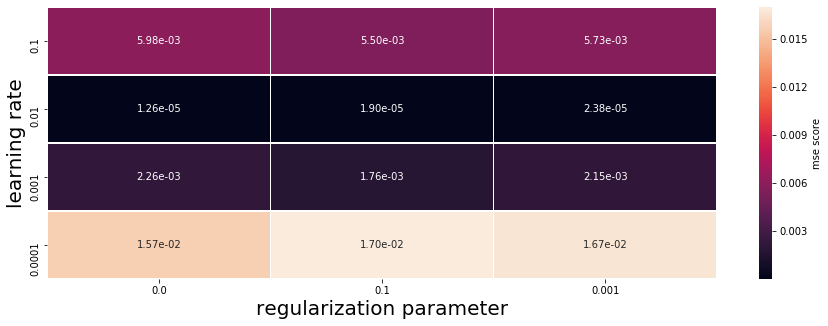

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np 

MSEs = pd.DataFrame(MSEs, columns=np.round(regularizations,6), index =np.round(learning_rates,6) )

fig = plt.figure(figsize=(15,5))

ax = sns.heatmap(MSEs, annot=True, fmt="1.2e", linewidths=0.5, cbar_kws={"label": "mse score"})
plt.ylim(top = 0, bottom=num_regularizations+1)
plt.xlabel("regularization parameter", fontsize=20)
plt.ylabel("learning rate", fontsize=20)

plt.savefig(r"Plots/heatmap_diffusion.png")

plt.show()